In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorspacious import cspace_converter
import numpy as np
import pandas as pd
from makeitpop import makeitpop, update_derivatives, cmaps
import seaborn as sns
sns.set(font_scale=2, style='white')

In [2]:
derivatives, derivatives_scaled = update_derivatives(cmaps)

[(0, 2)]

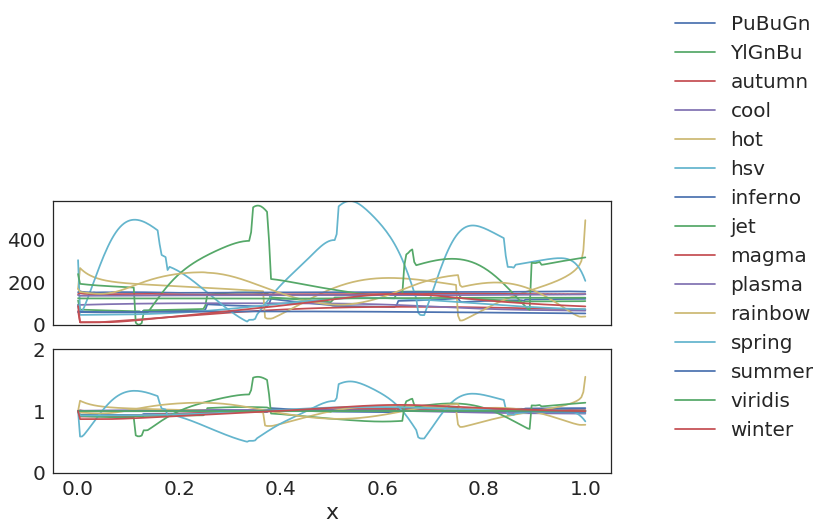

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

derivatives.plot(ax=axs[0], legend=False)
axs[0].legend(loc=(1.1, -1))
ylim = [np.min(derivatives.values),
        np.max(derivatives.values)]
axs[0].set(ylim=ylim)

derivatives_scaled.plot(ax=axs[1], legend=False)
axs[1].set(ylim=[0, 2])



Text(0.5,1,'Making data "pop" is fun!')

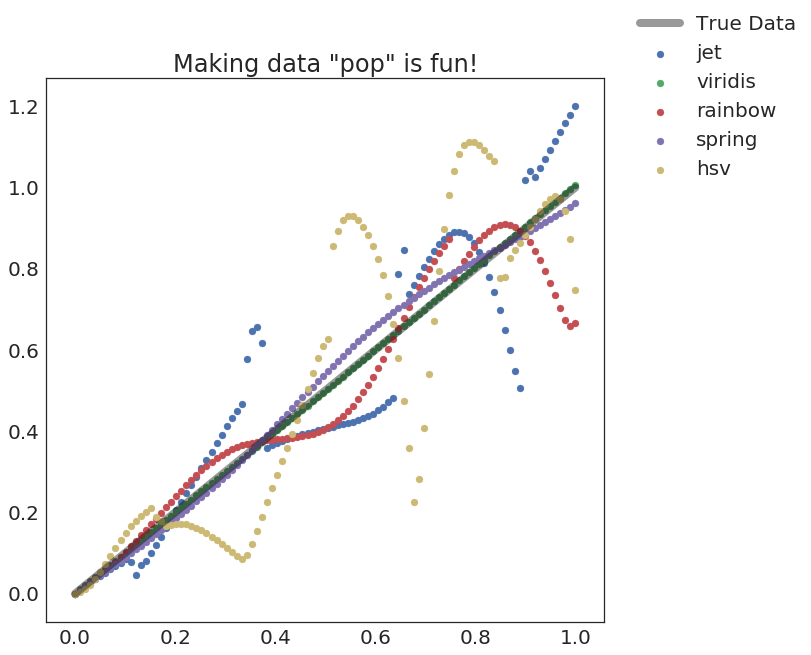

In [4]:
names = ['jet', 'viridis', 'rainbow', 'spring', 'hsv']
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 1, 100)
ax.plot(x, x, 'k-', lw=8, alpha=.4, label='True Data')
for nm in names:
    ax.scatter(x, makeitpop(x, colormap=nm, scaling_factor=1.5), label=nm)
    ax.legend(loc=(1.05, .8))
ax.set_title('Making data "pop" is fun!')

[Text(0.5,1,'Warped data, linear colormap')]

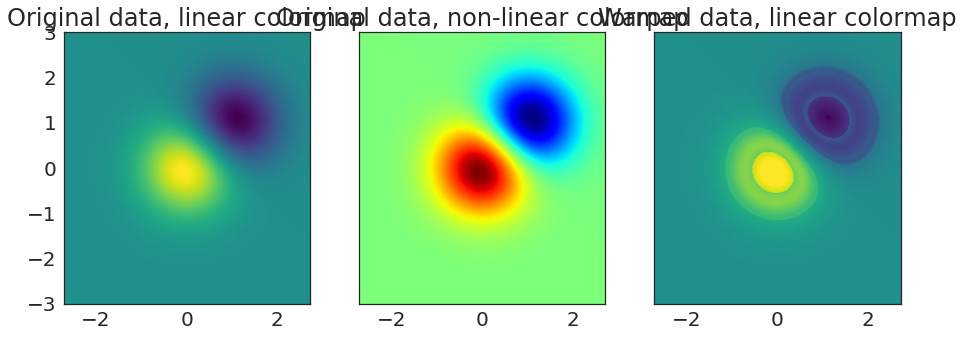

In [5]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Z_popped = makeitpop(Z, colormap='jet')
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


axs[0].imshow(Z, interpolation='bilinear', cmap=plt.cm.viridis,
              origin='lower', extent=[-3, 3, -3, 3],
              vmax=abs(Z).max(), vmin=-abs(Z).max())
axs[0].set(title="Original data, linear colormap")

axs[1].imshow(Z, interpolation='bilinear', cmap=plt.cm.jet,
              origin='lower', extent=[-3, 3, -3, 3],
              vmax=abs(Z).max(), vmin=-abs(Z).max())
axs[1].set(title="Original data, non-linear colormap")

axs[2].imshow(Z_popped, interpolation='bilinear', cmap=plt.cm.viridis,
              origin='lower', extent=[-3, 3, -3, 3],
              vmax=abs(Z).max(), vmin=-abs(Z).max())
axs[2].set(title="Warped data, linear colormap")


In [6]:
from nilearn import datasets
from nilearn import plotting
import nibabel as nb

tmap_filenames = datasets.fetch_localizer_button_task()['tmaps']
tmap_filename = tmap_filenames[0]

In [7]:
path = datasets.fetch_haxby_simple()
brain = nb.load(tmap_filename)
brain_data = brain.get_fdata()
mask = np.logical_or(brain_data < -.01, brain_data > .01)
brain_data[mask] = makeitpop(brain_data[mask], colormap='jet', scaling_factor=3)
brain_popped = nb.Nifti1Image(brain_data, brain.affine)

/home/choldgraf/anaconda/envs/dev/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_haxby_simple is deprecated; fetch_haxby_simple will be removed in future releases. Use 'fetch_haxby' instead.
  warnings.warn(msg, category=DeprecationWarning)


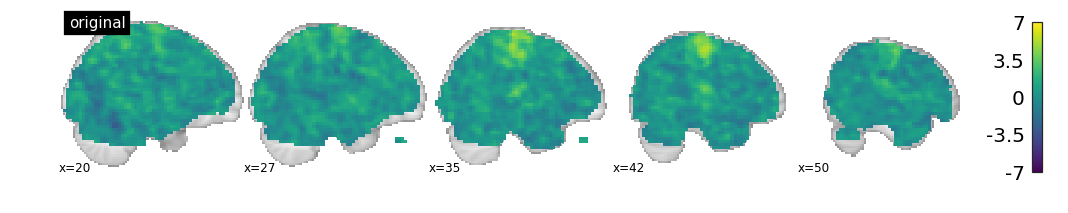

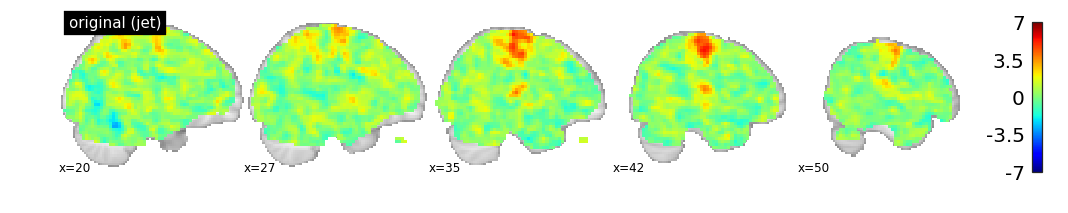

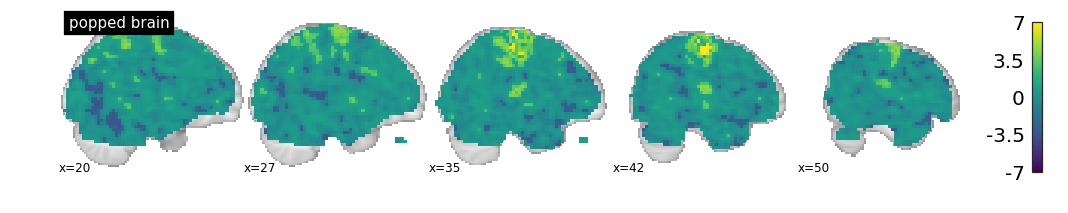

In [8]:
for i_brain, name in [(brain, 'original'), (brain, 'original (jet)'), (brain_popped, 'popped brain')]:
    cmap = 'jet' if name == 'original (jet)' else 'viridis'
    plotting.plot_stat_map(i_brain, cmap=cmap, vmax=7, display_mode='x', title=name, cut_coords=np.linspace(20, 50, 5, dtype=int))
